In [1]:
import os
import tensorflow as tf
import tensorflow_io as tfio
import matplotlib.pyplot as plt

In [2]:
capuchin_bird = os.path.join('data', 'Parsed_Capuchinbird_Clips', 'XC3776-5.wav')
noise = os.path.join('data', 'Parsed_Not_Capuchinbird_Clips', 'afternoon-birds-song-in-forest-2.wav')

In [3]:
def load_wav_16k_mono(file_path):
    file = tf.io.read_file(file_path)
    wav, sample_rate = tf.audio.decode_wav(file, desired_channels=1)
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

In [4]:
capuchin_bird_wave = load_wav_16k_mono(capuchin_bird)
noise_wave = load_wav_16k_mono(noise)

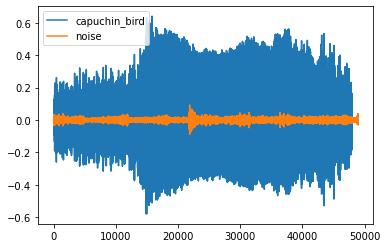

In [5]:
plt.plot(capuchin_bird_wave, label='capuchin_bird')
plt.plot(noise_wave, label='noise')
plt.legend()

In [6]:
capuchin_bird_dataset = os.path.join('data', 'Parsed_Capuchinbird_Clips')
noise_dataset = os.path.join('data', 'Parsed_Not_Capuchinbird_Clips')

In [7]:
capuchin_bird_data = tf.data.Dataset.list_files(capuchin_bird_dataset +'\*.wav')
noise_data = tf.data.Dataset.list_files(noise_dataset +'\*.wav')

In [8]:
capuchin_bird_data.as_numpy_iterator().next()

b'data\\Parsed_Capuchinbird_Clips\\XC395129-6.wav'

In [16]:
def get_label(dataset_zero_label, dataset_one_label):
    len_zeros = len(dataset_zero_label)
    len_ones = tf.ones(len(dataset_one_label))
    negatives = tf.data.Dataset.zip((dataset_zero_label, 
                                     tf.data.Dataset.from_tensor_slices(tf.zeros(len_zeros))))
    positives = tf.data.Dataset.zip((dataset_one_label,
                                     tf.data.Dataset.from_tensor_slices(len_ones)))
    data = positives.concatenate(negatives)
    return data

In [17]:
data = get_label(capuchin_bird_data, noise_data)

In [21]:
data.shuffle().as_numpy_iterator().next()

TypeError: DatasetV2.shuffle() missing 1 required positional argument: 'buffer_size'